In [2]:
pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 131.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 165.4 MB/s  0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.3-py2.py3-none-any.whl (348 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pandas]2m3/4 [pandas]
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 147.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 152.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 95.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 152.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [seaborn]m7/8 [seaborn]ib]
Note: you may need to restart the kernel to use updated packages.


In [3]:
# 01_eda.ipynb – Heart Disease EDA

from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set some plotting defaults
sns.set(style="whitegrid", context="notebook")

RAW_PATH = "/home/cloud/Documents/heart-disease-mlops/data/raw/heart_disease_raw.csv"
PROC_PATH = "/home/cloud/Documents/heart-disease-mlops/data/processed/heart_disease_clean_binary.csv"

# Ensure logs dir exists for saving figures
Path("logs").mkdir(exist_ok=True)

In [4]:
df_raw = pd.read_csv(RAW_PATH)

print("===== RAW DATA HEAD =====")
display(df_raw.head())

print("\n===== RAW DATA INFO =====")
display(df_raw.info())

print("\n===== RAW DATA DESCRIBE =====")
display(df_raw.describe(include="all"))

print("\n===== RAW TARGET VALUE COUNTS =====")
raw_target_col = df_raw.columns[-1]
display(df_raw[raw_target_col].value_counts())

===== RAW DATA HEAD =====


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0



===== RAW DATA INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


None


===== RAW DATA DESCRIBE =====


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000



===== RAW TARGET VALUE COUNTS =====


num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [5]:
# UCI heart disease datasets often have 0–4 as target.
# We collapse 1–4 to 1 to make a binary classification problem.

df_bin = df_raw.copy()

target_col = df_raw.columns[-1]
print("Original target column:", target_col)
print("Original target value counts:")
display(df_raw[target_col].value_counts())

# Create binary target: 0 = no disease, 1 = disease (1–4)
df_bin["target_binary"] = (df_bin[target_col] > 0).astype(int)

print("\nBinary target value counts:")
display(df_bin["target_binary"].value_counts())

# Save processed dataset
Path("data/processed").mkdir(parents=True, exist_ok=True)
out_path = PROC_PATH
df_bin.to_csv(out_path, index=False)
print(f"\n✓ Saved processed binary dataset to: {out_path}")

Original target column: num
Original target value counts:


num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


Binary target value counts:


target_binary
0    164
1    139
Name: count, dtype: int64


✓ Saved processed binary dataset to: /home/cloud/Documents/heart-disease-mlops/data/processed/heart_disease_clean_binary.csv


In [6]:
print("===== BINARY DATA HEAD =====")
display(df_bin.head())

print("\n===== BINARY DATA INFO =====")
display(df_bin.info())

print("\n===== BINARY DATA DESCRIBE =====")
display(df_bin.describe(include="all"))

===== BINARY DATA HEAD =====


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target_binary
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0



===== BINARY DATA INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             299 non-null    float64
 12  thal           301 non-null    float64
 13  num            303 non-null    int64  
 14  target_binary  303 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 35.6 KB


None


===== BINARY DATA DESCRIBE =====


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target_binary
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000


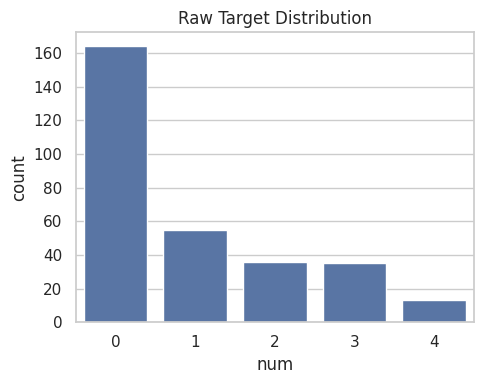

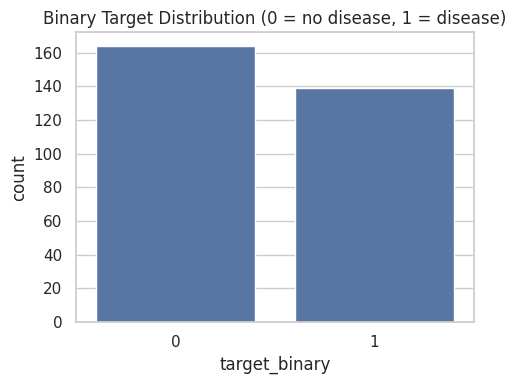

✓ Saved target distribution plots to logs/


In [7]:
plt.figure(figsize=(5, 4))
sns.countplot(x=raw_target_col, data=df_raw)
plt.title("Raw Target Distribution")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 4))
sns.countplot(x="target_binary", data=df_bin)
plt.title("Binary Target Distribution (0 = no disease, 1 = disease)")
plt.tight_layout()
plt.show()

# Optional: save to logs
plt.figure(figsize=(5, 4))
sns.countplot(x=raw_target_col, data=df_raw)
plt.title("Raw Target Distribution")
plt.tight_layout()
plt.savefig("logs/target_distribution_raw.png", dpi=120, bbox_inches="tight")
plt.close()

plt.figure(figsize=(5, 4))
sns.countplot(x="target_binary", data=df_bin)
plt.title("Binary Target Distribution (0 = no disease, 1 = disease)")
plt.tight_layout()
plt.savefig("logs/target_distribution_binary.png", dpi=120, bbox_inches="tight")
plt.close()

print("✓ Saved target distribution plots to logs/")

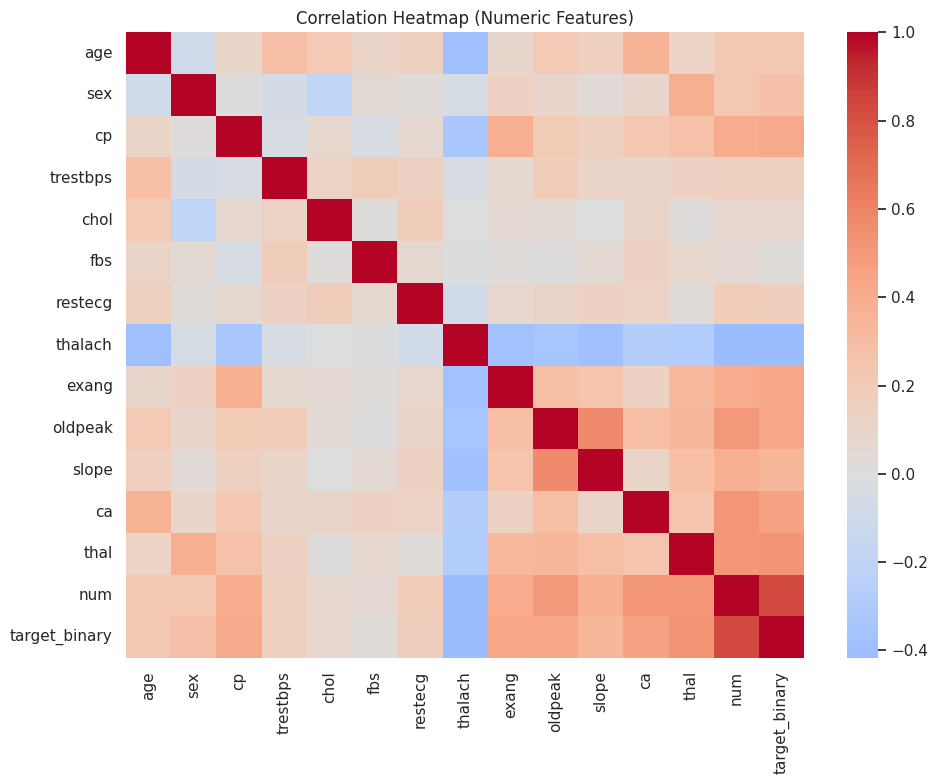

✓ Saved correlation heatmap to logs/corr_heatmap_binary.png


In [8]:
# Drop original multiclass target to avoid confusion in correlation
numeric_df = df_bin.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(10, 8))
corr = numeric_df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

# Save
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.savefig("logs/corr_heatmap_binary.png", dpi=120)
plt.close()

print("✓ Saved correlation heatmap to logs/corr_heatmap_binary.png")

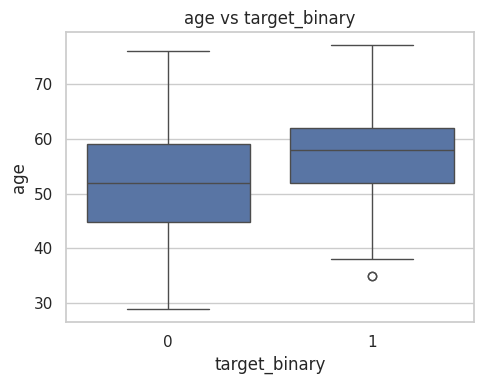

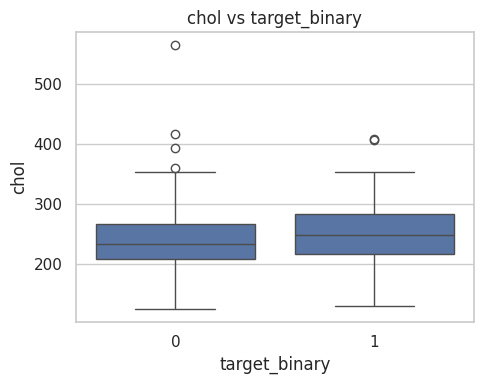

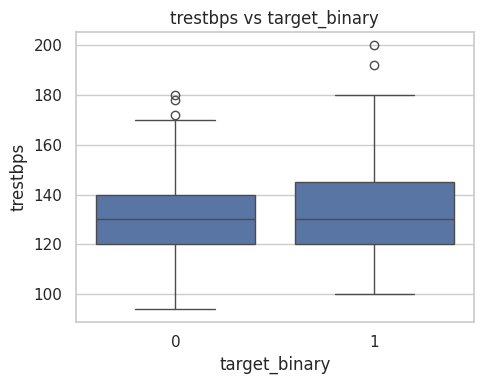

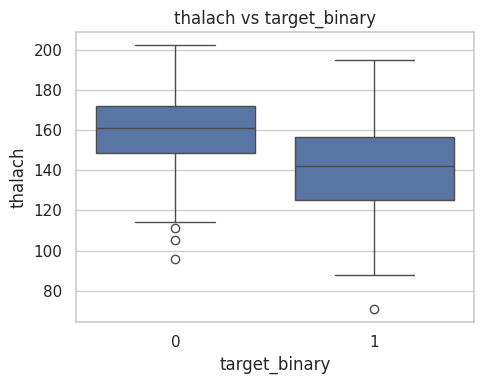

In [9]:
# Choose a few interesting features for visualization
features_to_plot = ["age", "chol", "trestbps", "thalach"]

for col in features_to_plot:
    if col in df_bin.columns:
        plt.figure(figsize=(5, 4))
        sns.boxplot(x="target_binary", y=col, data=df_bin)
        plt.title(f"{col} vs target_binary")
        plt.tight_layout()
        plt.show()